<a target="_blank" href="https://colab.research.google.com/github/vanderbilt-data-science/ai_summer/blob/main/3_3-solns-synthetic-data-generation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Synthetic Data Generation: From Langchain

Used nearly completely from: https://python.langchain.com/v0.1/docs/use_cases/data_generation/

## Use case

Synthetic data is artificially generated data, rather than data collected from real-world events. It's used to simulate real data without compromising privacy or encountering real-world limitations.

Benefits of Synthetic Data:

1. **Privacy and Security**: No real personal data at risk of breaches.
2. **Data Augmentation**: Expands datasets for machine learning.
3. **Flexibility**: Create specific or rare scenarios.
4. **Cost-effective**: Often cheaper than real-world data collection.
5. **Regulatory Compliance**: Helps navigate strict data protection laws.
6. **Model Robustness**: Can lead to better generalizing AI models.
7. **Rapid Prototyping**: Enables quick testing without real data.
8. **Controlled Experimentation**: Simulate specific conditions.
9. **Access to Data**: Alternative when real data isn't available.

Note: Despite the benefits, synthetic data should be used carefully, as it may not always capture real-world complexities.

## Quickstart

In this notebook, we'll dive deep into generating synthetic medical billing records using the langchain library. This tool is particularly useful when you want to develop or test algorithms but don't want to use real patient data due to privacy concerns or data availability issues.

### Setup
First, you'll need to have the langchain library installed, along with its dependencies. Since we're using the OpenAI generator chain, we'll install that as well. Since this is an experimental lib, we'll need to include `langchain_experimental` in our installs. We'll then import the necessary modules.

In [ ]:
%pip install --upgrade --quiet  langchain langchain_experimental langchain-openai

In [ ]:
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate
from langchain_core.pydantic_v1 import BaseModel
from langchain_experimental.tabular_synthetic_data.openai import (
    OPENAI_TEMPLATE,
    create_openai_data_generator,
)
from langchain_experimental.tabular_synthetic_data.prompts import (
    SYNTHETIC_FEW_SHOT_PREFIX,
    SYNTHETIC_FEW_SHOT_SUFFIX,
)
from langchain_openai import ChatOpenAI

## 1. Define Your Data Model
Every dataset has a structure or a "schema". The MedicalBilling class below serves as our schema for the synthetic data. By defining this, we're informing our synthetic data generator about the shape and nature of data we expect.

In [ ]:
class MedicalBilling(BaseModel):
    patient_id: int
    patient_name: str
    diagnosis_code: str
    procedure_code: str
    total_charge: float
    insurance_claim_amount: float

For instance, every record will have a `patient_id` that's an integer, a `patient_name` that's a string, and so on.

## 2. Sample Data
To guide the synthetic data generator, it's useful to provide it with a few real-world-like examples. These examples serve as a "seed" - they're representative of the kind of data you want, and the generator will use them to create more data that looks similar.

Here are some fictional medical billing records:

In [ ]:
examples = [
    {
        "example": """Patient ID: 123456, Patient Name: John Doe, Diagnosis Code:
        J20.9, Procedure Code: 99203, Total Charge: $500, Insurance Claim Amount: $350"""
    },
    {
        "example": """Patient ID: 789012, Patient Name: Johnson Smith, Diagnosis
        Code: M54.5, Procedure Code: 99213, Total Charge: $150, Insurance Claim Amount: $120"""
    },
    {
        "example": """Patient ID: 345678, Patient Name: Emily Stone, Diagnosis Code:
        E11.9, Procedure Code: 99214, Total Charge: $300, Insurance Claim Amount: $250"""
    },
]

## 3. Craft a Prompt Template
The generator doesn't magically know how to create our data; we need to guide it. We do this by creating a prompt template. This template helps instruct the underlying language model on how to produce synthetic data in the desired format.

In [ ]:
OPENAI_TEMPLATE = PromptTemplate(input_variables=["example"], template="{example}")

prompt_template = FewShotPromptTemplate(
    prefix=SYNTHETIC_FEW_SHOT_PREFIX,
    examples=examples,
    suffix=SYNTHETIC_FEW_SHOT_SUFFIX,
    input_variables=["subject", "extra"],
    example_prompt=OPENAI_TEMPLATE,
)

In [ ]:
print(prompt_template.invoke({"subject": "Medical Billing", "extra": "THIS IS WHERE THE EXTRA GOES"}).text)

This is a test about generating synthetic data about Medical Billing. Examples below:

Patient ID: 123456, Patient Name: John Doe, Diagnosis Code:
        J20.9, Procedure Code: 99203, Total Charge: $500, Insurance Claim Amount: $350

Patient ID: 789012, Patient Name: Johnson Smith, Diagnosis
        Code: M54.5, Procedure Code: 99213, Total Charge: $150, Insurance Claim Amount: $120

Patient ID: 345678, Patient Name: Emily Stone, Diagnosis Code:
        E11.9, Procedure Code: 99214, Total Charge: $300, Insurance Claim Amount: $250

Now you generate synthetic data about Medical Billing. Make sure to THIS IS WHERE THE EXTRA GOES:


The `FewShotPromptTemplate` includes:

- `prefix` and `suffix`: These likely contain guiding context or instructions.
- `examples`: The sample data we defined earlier.
- `input_variables`: These variables ("subject", "extra") are placeholders you can dynamically fill later. For instance, "subject" might be filled with "medical_billing" to guide the model further.
- `example_prompt`: This prompt template is the format we want each example row to take in our prompt.

## 4. Creating the Data Generator
With the schema and the prompt ready, the next step is to create the data generator. This object knows how to communicate with the underlying language model to get synthetic data.

In [ ]:
# oops, error! let's debug
#from google.colab import userdata
import os
#os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
synthetic_data_generator = create_openai_data_generator(
    output_schema=MedicalBilling,
    llm=ChatOpenAI(model_name="gpt-4o", temperature=1),
    prompt=prompt_template,
)

## 5. Generate Synthetic Data
Finally, let's get our synthetic data!

In [ ]:
synthetic_results = synthetic_data_generator.generate(
    subject="medical_billing",
    extra="the name must be chosen at random. Make it something you wouldn't normally choose.",
    runs=10,
)

This command asks the generator to produce 10 synthetic medical billing records. The results are stored in `synthetic_results`. The output will be a list of the MedicalBilling pydantic models.

In [ ]:
synthetic_results

[MedicalBilling(patient_id=112233, patient_name='Aerith Gainsborough', diagnosis_code='I10', procedure_code='99215', total_charge=450.0, insurance_claim_amount=400.0),
 MedicalBilling(patient_id=654321, patient_name='Morgan Thorne', diagnosis_code='J02.9', procedure_code='99212', total_charge=200.0, insurance_claim_amount=160.0),
 MedicalBilling(patient_id=789012, patient_name='Quincy Vandermeer', diagnosis_code='M54.5', procedure_code='99213', total_charge=350.0, insurance_claim_amount=300.0),
 MedicalBilling(patient_id=555888, patient_name='Balthazar Ziggler', diagnosis_code='E11.9', procedure_code='99214', total_charge=500.0, insurance_claim_amount=450.0),
 MedicalBilling(patient_id=123456, patient_name='Zephyr Glowinski', diagnosis_code='H52.4', procedure_code='99211', total_charge=150.0, insurance_claim_amount=120.0),
 MedicalBilling(patient_id=894563, patient_name='Ulrich Fenwick', diagnosis_code='K21.0', procedure_code='99212', total_charge=280.0, insurance_claim_amount=240.0),


## Let generative AI help you code.
We can use generative AI to help with next steps.

In [ ]:
import pandas as pd

# Convert each Pydantic object to a dictionary
data_dicts = [item.dict() for item in synthetic_results]

# Create a DataFrame
df = pd.DataFrame(data_dicts)

display(df)

,patient_id,patient_name,diagnosis_code,procedure_code,total_charge,insurance_claim_amount
0,112233,Aerith Gainsborough,I10,99215,450.0,400.0
1,654321,Morgan Thorne,J02.9,99212,200.0,160.0
2,789012,Quincy Vandermeer,M54.5,99213,350.0,300.0
3,555888,Balthazar Ziggler,E11.9,99214,500.0,450.0
4,123456,Zephyr Glowinski,H52.4,99211,150.0,120.0
5,894563,Ulrich Fenwick,K21.0,99212,280.0,240.0
6,748392,Persimmon Nightshade,I10,99213,350.0,310.0
7,567890,Clover Tumblewood,J30.1,99214,450.0,410.0
8,235671,Nimbus Ferngrove,E11.9,99215,500.0,450.0
9,183457,Toodlefrump Wafflebee,Z23,99395,375.0,335.0


In [ ]:
# save df to csv
df.to_csv('synthetic_data.csv', index=False)

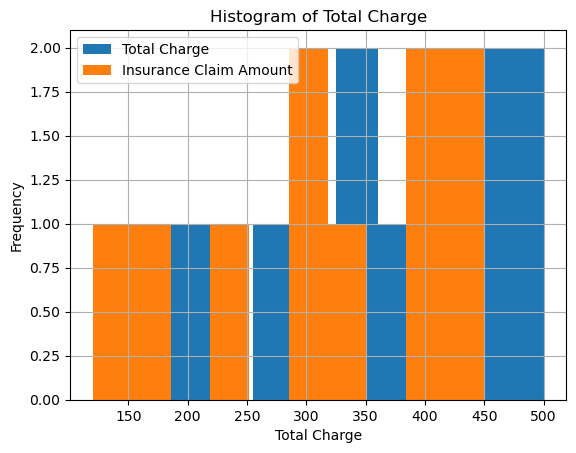

In [ ]:
# import matplotlib.pyplot
import matplotlib.pyplot as plt

# prompt: Using dataframe df: histogram of total_charge
df['total_charge'].hist()

# add histogram of insurance_claim_amount
df['insurance_claim_amount'].hist()

# add title
plt.title('Histogram of Total Charge')

# add x label
plt.xlabel('Total Charge')

# add y label
plt.ylabel('Frequency')

# add legend
plt.legend(['Total Charge', 'Insurance Claim Amount'])

# show plot
plt.show()